## Chapter 1: Neural Networks

<b>Perceptron takes a set of inputs, sums them all up, passes them thruogh an activation function.

Activation function determiens whether to send output and at what level to send it when activated,

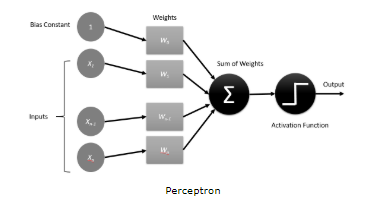

In [1]:
inputs = [1,2]
weights = [1,1,1]

def perceptron_predict(inputs, weights):
    activation = weights[0]    
    for i in range(len(inputs)-1):
      activation += weights[i+1] * inputs[i]
      return 1.0 if activation >= 0.0 else 0.0

print(perceptron_predict(inputs,weights))

1.0


In [2]:
train = [[1,2],[2,3],[1,1],[2,2],[3,3],[4,2],[2,5],[5,5],[4,1],[4,4]]
weights = [1,1,1]

def perceptron_predict(inputs, weights):
    activation = weights[0]    
    for i in range(len(inputs)-1):
      activation += weights[i+1] * inputs[i]
      return 1.0 if activation >= 0.0 else 0.0

for inputs in train:
  print(perceptron_predict(inputs,weights))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<b> Using Gradient Descent to adjust weights

In [6]:
def perceptron_predict(inputs, weights):
    activation = weights [0]
    for i in range(len(inputs)-1):
        activation += weights [i + 1] * inputs [i]
    return 1.0 if activation >= 0.0 else 0.0
    
def train_weights(train, learning_rate, epochs):
 weights = [0.0 for i in range(len(train[0]))]
 for epoch in range(epochs):
  sum_error = 0.0
  for inputs in train:
   prediction = perceptron_predict(inputs, weights)
   error = inputs[-1] - prediction
   sum_error += error**2
   weights[0] = weights[0] + learning_rate * error
   for i in range(len(inputs)-1):
    weights[i + 1] = weights[i + 1] + learning_rate * error * inputs[i]
  print('>epoch=%d, learning_rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
 return weights

train = [[1.5,2.5,0],[2.5,3.5,0],[1.0,11.0,1],[2.3,2.3,1],[3.6,3.6,1],[4.2,2.4,0],[2.4,5.4,0],[5.1,5.1,1],[4.3,1.3,0],[4.8,4.8,1]]

learning_rate = 0.1
#Epoch is a passthrough training data
#Helps to converage at global minimum rather than local
epochs = 10
weights = train_weights(train, learning_rate, epochs)
print(weights)

>epoch=0, learning_rate=0.100, error=5.000
>epoch=1, learning_rate=0.100, error=6.000
>epoch=2, learning_rate=0.100, error=4.000
>epoch=3, learning_rate=0.100, error=7.000
>epoch=4, learning_rate=0.100, error=6.000
>epoch=5, learning_rate=0.100, error=6.000
>epoch=6, learning_rate=0.100, error=4.000
>epoch=7, learning_rate=0.100, error=5.000
>epoch=8, learning_rate=0.100, error=6.000
>epoch=9, learning_rate=0.100, error=6.000
[-0.8999999999999999, -0.3900000000000005, 0.6899999999999998]


<b>Multi-layer Perceptron in Tensorflow

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer


# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            c, _ = sess.run([loss_op, train_op], feed_dict={X: batch_x,Y: batch_y})

            # Compute average loss
            avg_cost += c / total_batch

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

C:\Users\Watson Turbo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Watson Turbo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Watson Turbo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Watson Turbo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

<b> Training Neural Networks with Backpropagation

-Sum up all of the errors across the output layer

-backpropagate the error back through the network

-update each weight based on contribution to total error

<b>Cost Function-describes the average sum of errors for a batch in the entire network

        <i>C(w1, w2,...,wn) = C(w)

## Building an Autoencoder with Keras

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3527 - val_loss: 0.2683
Epoch 2/15
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2580 - val_loss: 0.2438
Epoch 3/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2324 - val_loss: 0.2195
Epoch 4/15
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2117 - val_loss: 0.2020
Epoch 5/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1968 - val_loss: 0.1893
Epoch 6/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1857 - val_loss: 0.1796
Epoch 7/15
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1769 - val_loss: 0.1717
Epoch 8/15
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1696 - val_loss: 0.1650
Epoch 9/15
60000/60000 [==============================] - 2s 35us/sa

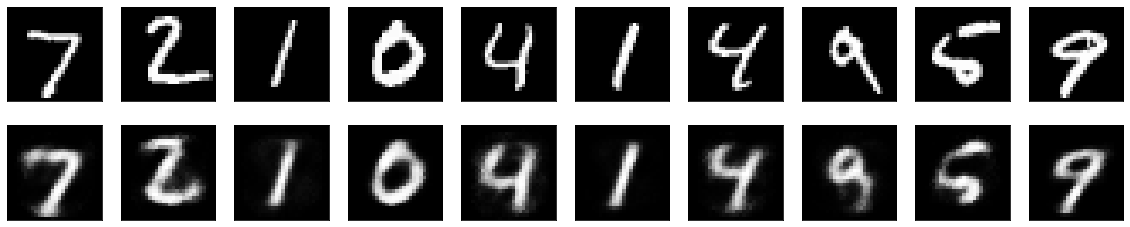

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Using TensorFlow backend.


(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 44us/step - loss: 0.3506 - val_loss: 0.2681
Epoch 2/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2583 - val_loss: 0.2443
Epoch 3/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.2317 - val_loss: 0.2178
Epoch 4/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.2102 - val_loss: 0.2004
Epoch 5/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1956 - val_loss: 0.1882
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1851 - val_loss: 0.1791
Epoch 7/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1770 - val_loss: 0.1719
Epoch 8/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1701 - val_loss: 0.1654
Epoch 9/15
60000/60000 [==============================] - 2s 34us/step - loss: 0.164

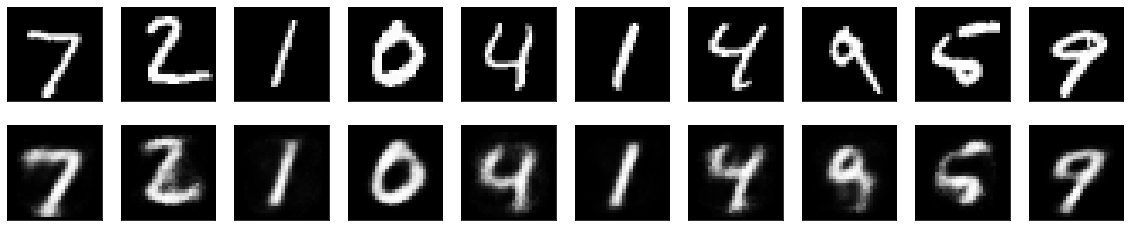

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
# Make a prediction with weights
def perceptron_predict(inputs, weights):
	activation = weights[0]
	for i in range(len(inputs)-1):
		activation += weights[i + 1] * inputs[i]
	return 1.0 if activation  >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, learning_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for inputs in train:
			prediction = perceptron_predict(inputs, weights)
			error = inputs[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + learning_rate * error
			for i in range(len(inputs)-1):
				weights[i + 1] = weights[i + 1] + learning_rate * error * inputs[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
	return weights

train = [[1.5,2.5,0],[2.5,3.5,0],[1.0,11.0,1],[2.3,2.3,1],[3.6,3.6,1],[4.2,2.4,0],[2.4,5.4,0],[5.1,5.1,1],[4.3,1.3,0],[4.8,4.8,1]]

learning_rate = 0.1
epochs = 10
weights = train_weights(train, learning_rate, epochs)
print(weights)

>epoch=0, lrate=0.100, error=5.000
>epoch=1, lrate=0.100, error=6.000
>epoch=2, lrate=0.100, error=4.000
>epoch=3, lrate=0.100, error=7.000
>epoch=4, lrate=0.100, error=6.000
>epoch=5, lrate=0.100, error=6.000
>epoch=6, lrate=0.100, error=4.000
>epoch=7, lrate=0.100, error=5.000
>epoch=8, lrate=0.100, error=6.000
>epoch=9, lrate=0.100, error=6.000
[-0.8999999999999999, -0.3900000000000005, 0.6899999999999998]


## Exercises

1. Name three different activation functions. Remember, Google is your friend.
<b>Sigmoid-predicting probability of an output between 0 and 1. "S Shaped" curve
    
Softmax-logistic activation function used for multiclass classification
    
Tanh-hyperbolic tanget function, range from -1 to 1. 

Sigmoidal shaped curve. Zero inputs mapped near zero and strong negative inputs mapped near -1.

ReLU-Rectified Linear Unit. Used in convolutional neural net and deep learning. Range 0 to infinity. Does not map negative values appropriatly. 
Thus LEAKY ReLU.

2. What is the purpose of a bias?
<b>

3. What would you expect to happen if you reduced the number of epochs in one of the chapter samples? Did you try it?
<b>

4. What is the purpose of backpropagation?
<b>

5. Explain the purpose of the Cost function.
<b>

6. What happens when you increase or decrease the number of encoding dimensions in the Keras autoencoder example?
<b>

7. What is the name of the layer type that we feed input into?
<b>

8. What happens when you increase or decrease the batch size?
<b>

9. What is the shape of the input Tensor for the Keras example? Hint: we already have a print statement displaying this.
<b>

10. In the last exercise, how many MNIST samples do we train and test with?
<b>